In [5]:
# Immport necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


# *** EDA *** 

In [6]:
# load dataset

df = pd.read_csv(r"C:\Users\Sanael\Desktop\University\Tesis_Information\WIP\Dataset\sales.csv")

# basic information about the dataset
print("Shape of the dataset", df.shape)
display(df.head())

Shape of the dataset (4248, 20)


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [16]:
# Statistical overview of numerical variables

df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [17]:
# Statistical overview of categorical variables

df[['State', 'Market', 'Market Size', 'Product Type']].describe()

,State,Market,Market Size,Product Type
count,4248,4248,4248,4248
unique,20,4,2,4
top,Utah,West,Small Market,Espresso
freq,288,1344,2544,1176


array([[<Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Margin'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'COGS'}>,
        <Axes: title={'center': 'Total Expenses'}>,
        <Axes: title={'center': 'Marketing'}>,
        <Axes: title={'center': 'Inventory'}>],
       [<Axes: title={'center': 'Budget Profit'}>,
        <Axes: title={'center': 'Budget COGS'}>,
        <Axes: title={'center': 'Budget Margin'}>,
        <Axes: title={'center': 'Budget Sales'}>],
       [<Axes: title={'center': 'ProductId'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

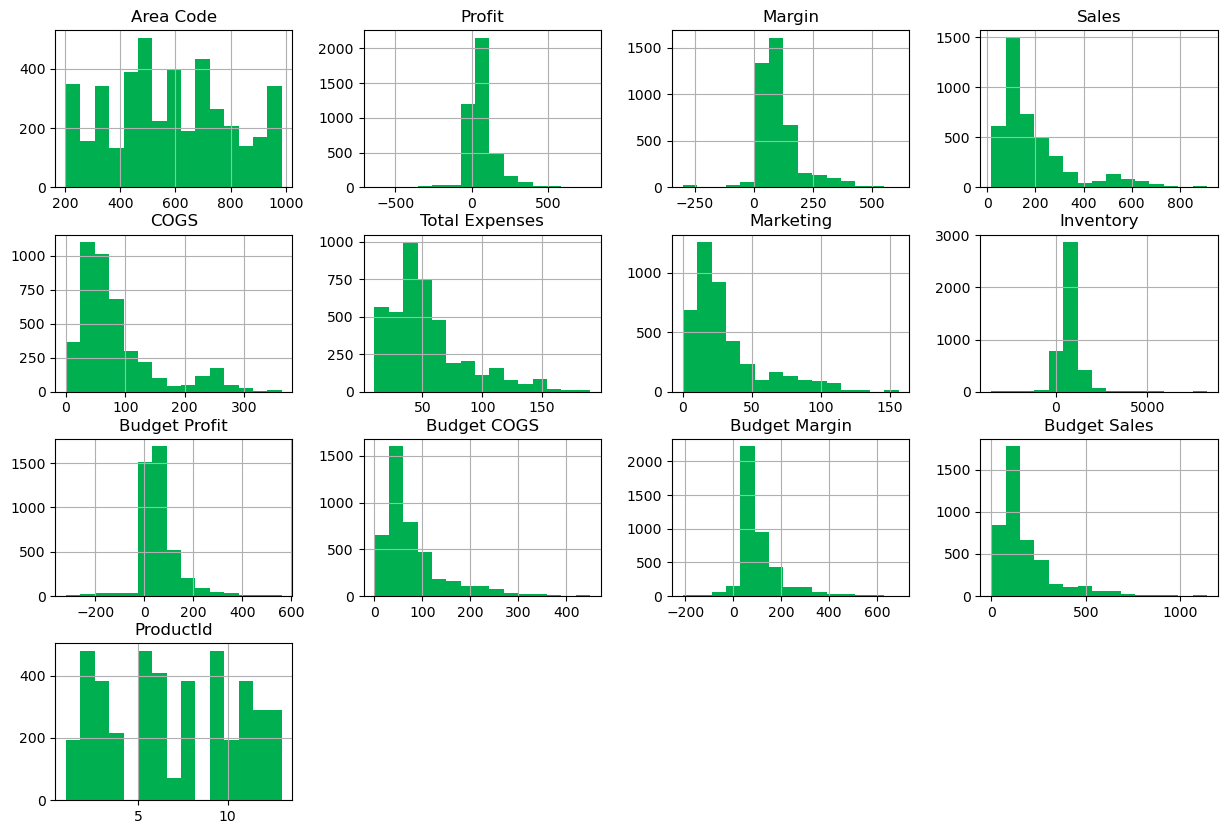

In [18]:
# historgrams to visualize how the data is distributed among the different variables

df.hist(bins=15, color='#00B050', figsize=(15,10) )

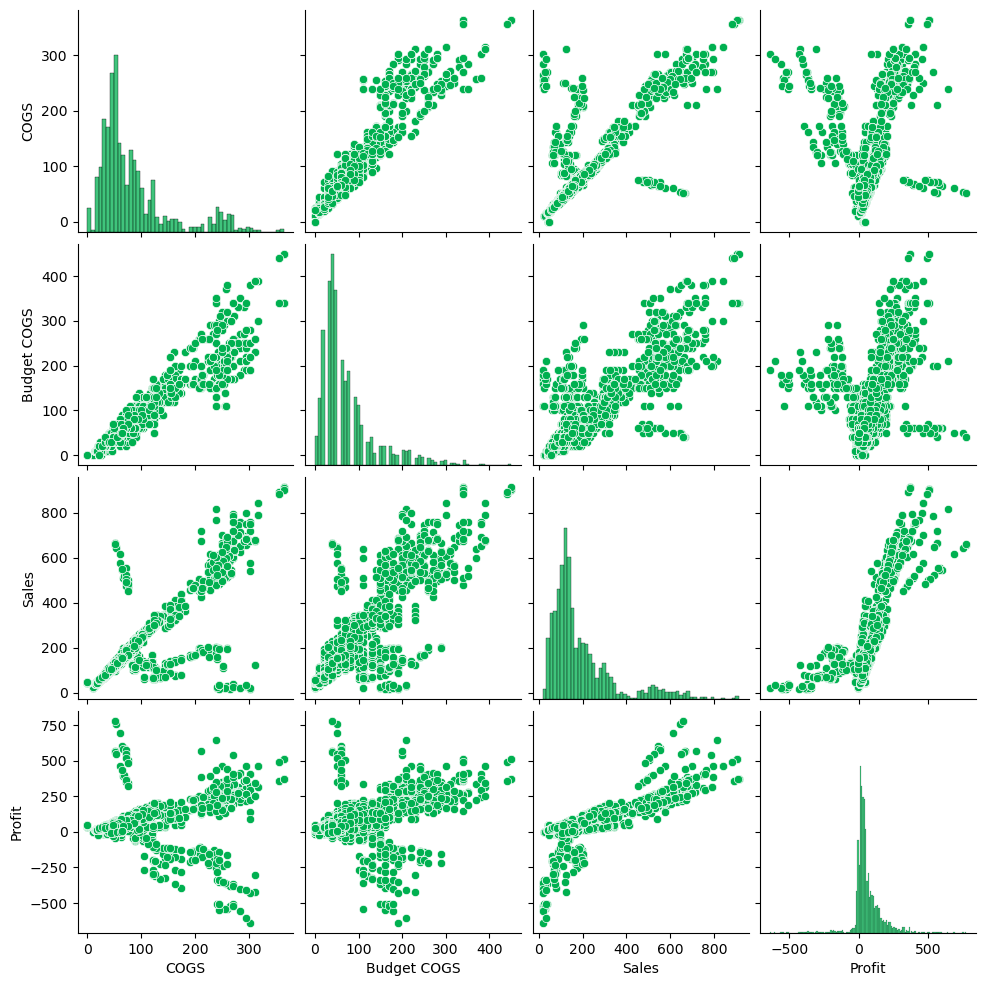

In [19]:
import seaborn as sns
sns.pairplot(
    df[['COGS', 'Budget COGS', 'Sales', 'Profit']],
    diag_kws={'color': '#00B050'},   # Sets the histogram color
    plot_kws={'color': '#00B050'}    # Sets the scatter plot color
)

In [7]:
# Using label encoding for "Market Size" --> 1 represent "Small Market" and 2 represent "Major Market"

le = LabelEncoder()
df['Market Size'] = le.fit_transform(df['Market Size'])

In [8]:
# Using One-Hot encoding for "Product Type"

df = pd.get_dummies(df, columns=['Product Type'])

In [9]:
# Transformed the "Date" column into Date format

df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Sanael\AppData\Local\Temp\ipykernel_17204\758035163.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget Margin,Budget Sales,ProductId,Date,Product,Type,Product Type_Coffee,Product Type_Espresso,Product Type_Herbal Tea,Product Type_Tea
0,203,Connecticut,East,1,107.0,176.0,292.0,116.0,69.0,38.0,...,160.0,270.0,2,2010-04-01,Columbian,Regular,True,False,False,False
1,203,Connecticut,East,1,75.0,135.0,225.0,90.0,60.0,29.0,...,130.0,210.0,2,2010-07-01,Columbian,Regular,True,False,False,False
2,203,Connecticut,East,1,122.0,195.0,325.0,130.0,73.0,42.0,...,180.0,290.0,2,2010-11-01,Columbian,Regular,True,False,False,False
3,203,Connecticut,East,1,105.0,174.0,289.0,115.0,69.0,37.0,...,160.0,260.0,2,2010-12-01,Columbian,Regular,True,False,False,False
4,203,Connecticut,East,1,104.0,135.0,223.0,90.0,56.0,29.0,...,130.0,210.0,2,2011-07-01,Columbian,Regular,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,1,-6.0,66.0,113.0,47.0,72.0,42.0,...,50.0,90.0,4,2010-07-01,Caffe Latte,Regular,False,True,False,False
4244,985,Louisiana,South,1,-7.0,61.0,105.0,44.0,68.0,39.0,...,60.0,90.0,4,2010-08-01,Caffe Latte,Regular,False,True,False,False
4245,985,Louisiana,South,1,-3.0,76.0,131.0,55.0,79.0,49.0,...,60.0,100.0,4,2010-12-01,Caffe Latte,Regular,False,True,False,False
4246,985,Louisiana,South,1,1.0,87.0,160.0,63.0,86.0,57.0,...,70.0,120.0,4,2011-04-01,Caffe Latte,Regular,False,True,False,False


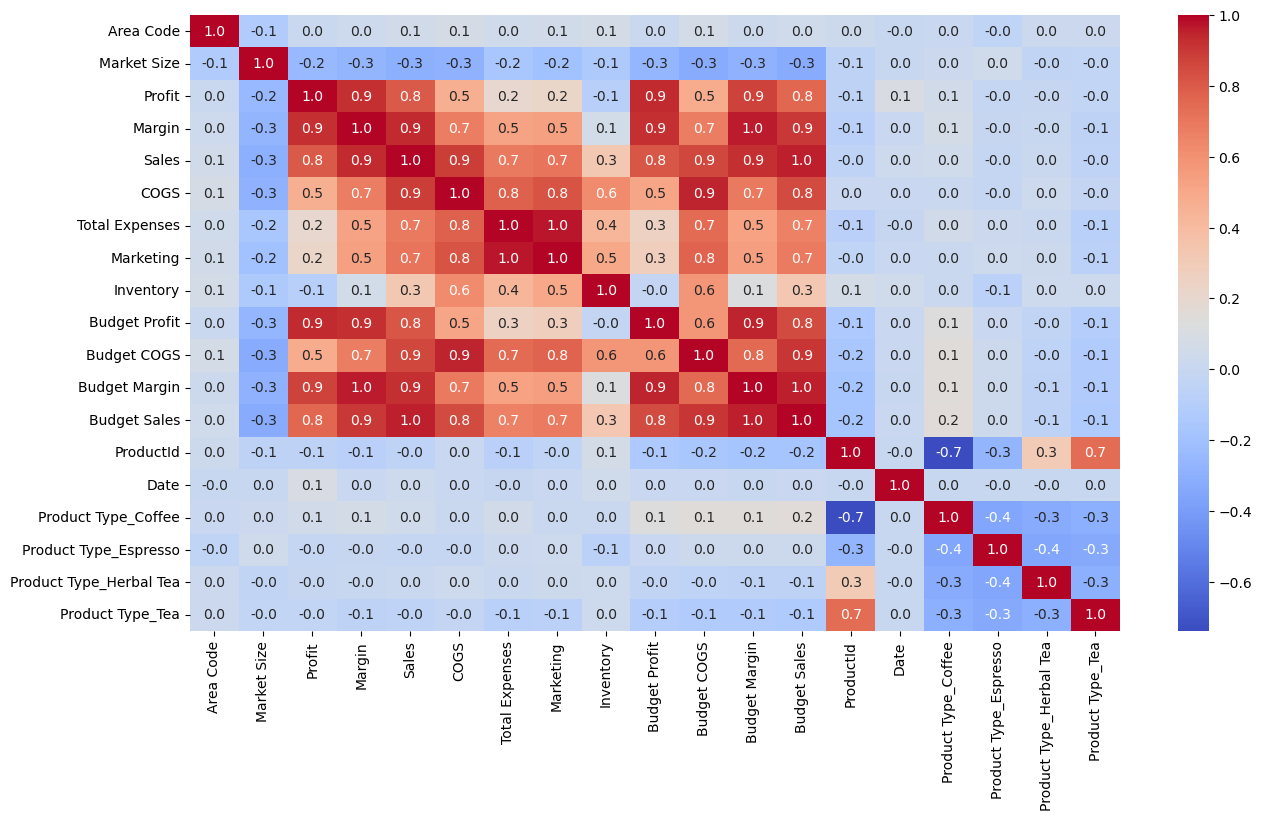

In [17]:
# Plotting a correlation matrix

df_numerical = df.drop(['State', 'Market', 'Product', 'Type'], axis=1).copy() # Dropping categorical variables

plt.figure(figsize=(15, 8))  # Adjust width & height
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

# Isolation Forest Development

In [18]:
# Parameters

n_estimators = 100 # number of trees
sample_size = 256 # Number of somples used to train each tree
contamination = 0.05 # Expected proportion of anomalies 5%

In [19]:
# Extract specific statistics (mean, std, 25%, and 75%)
stats = df[['COGS', 'Sales', 'Marketing', 'Total Expenses', 'Budget COGS', 'Profit']].describe().loc[['mean', 'std', '25%', '75%']]

stats_rounded = stats.round(1)
# Display the result
print(stats_rounded)

       COGS  Sales  Marketing  Total Expenses  Budget COGS  Profit
mean   84.4  193.0       31.2            54.1         74.8    61.1
std    67.2  151.1       27.0            32.4         66.2   101.7
25%    43.0  100.0       13.0            33.0         30.0    17.0
75%   100.0  230.0       39.0            65.0         90.0    92.0


In [20]:
features = df_numerical[['COGS', 'Sales','Marketing', 'Total Expenses', 'Budget COGS', 'Profit']].copy()

In [21]:
# Train and split data, later fitting it into the algorithm

# Train / test split (80% training, 20% testing)
X_train, x_test, = train_test_split(features, test_size=0.2, random_state=42)

# Initialize and train Isolation Forest Algorithm 

iso_forest = IsolationForest( n_estimators = n_estimators,
                             contamination = contamination,
                             max_samples = sample_size,
                             random_state = 42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.05, max_samples=256, random_state=42)

In [22]:
# Using the trained model to include the anomalies prediction and score to the test set

anomaly_prediction = iso_forest.predict(x_test)
anomaly_scores = iso_forest.decision_function(x_test)

x_test['anomaly'] = anomaly_prediction
x_test['anomaly_score'] = anomaly_scores

x_test['anomaly'].value_counts()

anomaly
 1    804
-1     46
Name: count, dtype: int64

In [23]:
# Mergin 'Date' in the x_test dataset 

x_test = x_test.merge(df[['Date']], left_index=True, right_index=True, how='left')

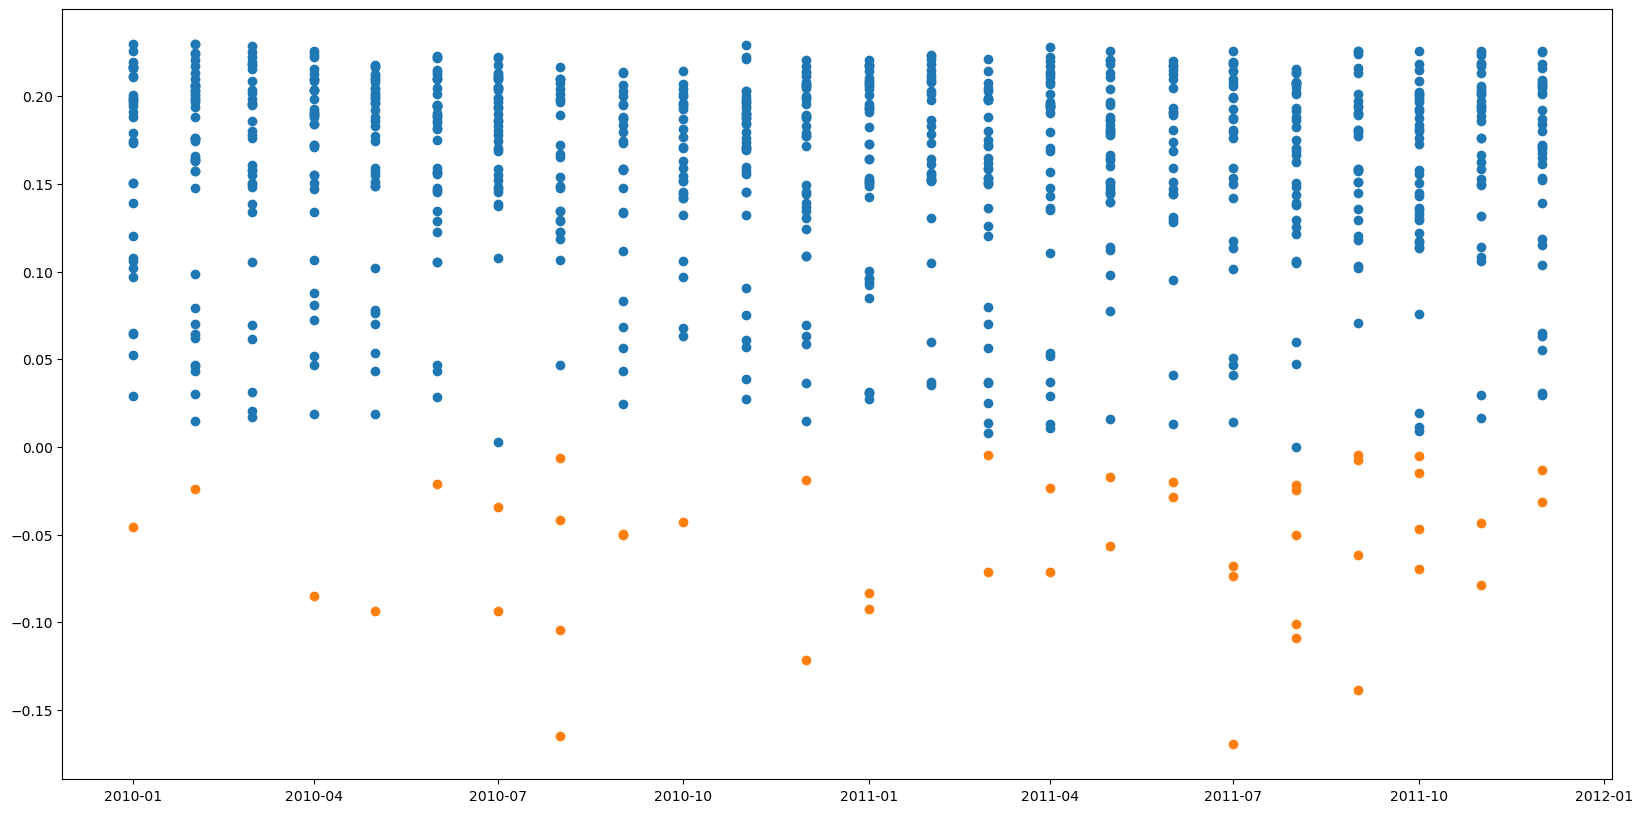

In [24]:
plt.figure(figsize=(20,10))

# plot normal instances
normal = x_test[x_test['anomaly'] == 1]
plt.scatter(normal['Date'], normal['anomaly_score'], label='Nomal')

# Plot anomalies
anomalies = x_test[x_test['anomaly'] == -1]
plt.scatter(anomalies['Date'], anomalies['anomaly_score'], label = 'anomaly')

In [25]:
anomalies = x_test[x_test['anomaly'] == -1]
anomalies

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit,anomaly,anomaly_score,Date
166,249.0,664.0,87.0,139.0,290.0,349.0,-1,-0.043322,2011-11-01
1024,258.0,645.0,90.0,142.0,320.0,245.0,-1,-0.024181,2010-02-01
3901,200.0,167.0,66.0,103.0,250.0,-196.0,-1,-0.028648,2011-06-01
3810,302.0,541.0,114.0,147.0,220.0,92.0,-1,-0.050362,2010-09-01
2222,121.0,68.0,110.0,144.0,110.0,-197.0,-1,-0.049635,2010-09-01
1872,284.0,626.0,107.0,131.0,240.0,286.0,-1,-0.021885,2011-08-01
1138,239.0,554.0,74.0,96.0,350.0,275.0,-1,-0.005090,2011-10-01
2749,135.0,322.0,122.0,155.0,120.0,32.0,-1,-0.018817,2010-12-01
2638,364.0,910.0,127.0,178.0,450.0,368.0,-1,-0.164984,2010-08-01
511,253.0,628.0,83.0,116.0,290.0,326.0,-1,-0.004787,2011-09-01


In [26]:
# Sorting by top 5 anomalies

top_5_anomalies = anomalies.sort_values(by='anomaly_score').head(5)

In [30]:
top_5_anomalies.loc[157,]

COGS                            173.0
Sales                            77.0
Marketing                       156.0
Total Expenses                  176.0
Budget COGS                     160.0
Profit                         -392.0
anomaly                            -1
anomaly_score               -0.108716
Date              2011-08-01 00:00:00
Name: 157, dtype: object

In [18]:
top_5_anomalies.drop('Date', axis=1, inplace=True)

In [19]:
top_5_anomalies.drop(['anomaly', 'anomaly_score'], axis=1, inplace=True)

In [20]:
top_5_anomalies

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit
2639,364.0,904.0,127.0,166.0,450.0,511.0
2638,364.0,910.0,127.0,178.0,450.0,368.0
1874,316.0,842.0,110.0,162.0,300.0,463.0
3268,294.0,31.0,111.0,145.0,210.0,-408.0
157,173.0,77.0,156.0,176.0,160.0,-392.0


# *** SHAP ***

In [38]:
x_test

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit,anomaly,anomaly_score,Date
718,245.0,545.0,93.0,127.0,200.0,173.0,1,0.038625,2010-11-01
3116,62.0,136.0,19.0,40.0,50.0,34.0,1,0.223927,2010-02-01
3061,91.0,223.0,25.0,36.0,90.0,96.0,1,0.172164,2010-04-01
2552,228.0,490.0,63.0,87.0,210.0,175.0,1,0.064701,2010-01-01
120,48.0,110.0,15.0,28.0,40.0,34.0,1,0.212875,2010-06-01
...,...,...,...,...,...,...,...,...,...
907,30.0,75.0,8.0,20.0,30.0,25.0,1,0.184260,2010-04-01
2603,243.0,567.0,80.0,112.0,200.0,212.0,1,0.061258,2010-03-01
1338,38.0,95.0,12.0,39.0,20.0,18.0,1,0.201174,2011-12-01
3786,118.0,309.0,33.0,45.0,90.0,188.0,1,0.114147,2011-11-01


In [21]:
# Explanation with SHAP

explainer = shap.Explainer(iso_forest, X_train)

In [2]:
# Creating a variable for each top 5 anomalies

anomaly_1 = top_5_anomalies.loc[[2639]]
anomaly_2 = top_5_anomalies.loc[[2638]]
anomaly_3 = top_5_anomalies.loc[[1874]]
anomaly_4 = top_5_anomalies.loc[[3268]]
anomaly_5 = top_5_anomalies.loc[[157]]

NameError: name 'top_5_anomalies' is not defined

In [23]:
# Shape of the train dataset to compare with 
print(X_train.shape)

(3398, 6)


In [24]:
anomaly_1

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit
2639,364.0,904.0,127.0,166.0,450.0,511.0


In [25]:
x_test.loc[[3116]]

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit,anomaly,anomaly_score,Date
3116,62.0,136.0,19.0,40.0,50.0,34.0,1,0.223927,2010-02-01


# SHAP values for normal instances

In [44]:
# shap values for "normal" instances

test_shap = explainer(x_test.drop(['Date', 'anomaly', 'anomaly_score'], axis=1).loc[[3116]])

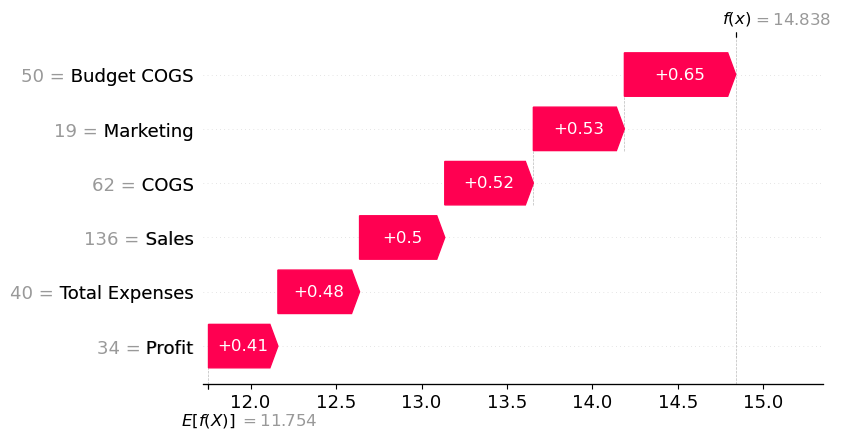

In [45]:
shap.plots.waterfall(test_shap[0], max_display=10)

In [26]:
# PAss the anomaly 1 to the SHAP explainer 
shap_value = explainer(anomaly_1)

In [27]:
shap_value

.values =
array([[-1.53756849, -1.39178724, -1.16067517, -1.00961836, -1.44942217,
        -1.14750935]])

.base_values =
array([11.75364707])

.data =
array([[364., 904., 127., 166., 450., 511.]])

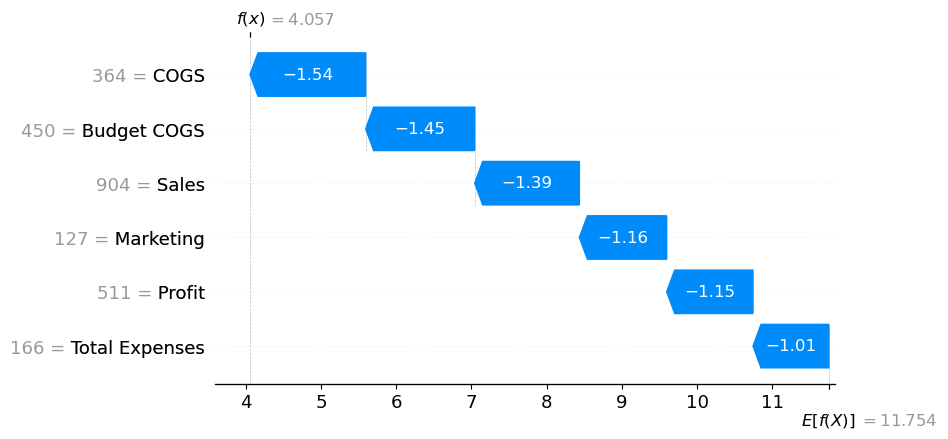

In [28]:
# SHAP values plot for anomaly 1 

shap.plots.waterfall(shap_value[0], max_display=10)

In [29]:
feature_names = shap_value[0].feature_names
shap_values = shap_value[0].values

In [30]:
feature_names

['COGS', 'Sales', 'Marketing', 'Total Expenses', 'Budget COGS', 'Profit']

In [31]:
# code with the help of GPT --> cite it properly

df_shap = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Value": shap_values,
}).sort_values(by="SHAP Value", key=abs, ascending=False)


In [32]:
df_shap

,Feature,SHAP Value
0,COGS,-1.537568
4,Budget COGS,-1.449422
1,Sales,-1.391787
2,Marketing,-1.160675
5,Profit,-1.147509
3,Total Expenses,-1.009618


In [33]:
df_shap[df_shap['Feature'] == 'COGS']['SHAP Value'].values[0]

-1.537568492096616

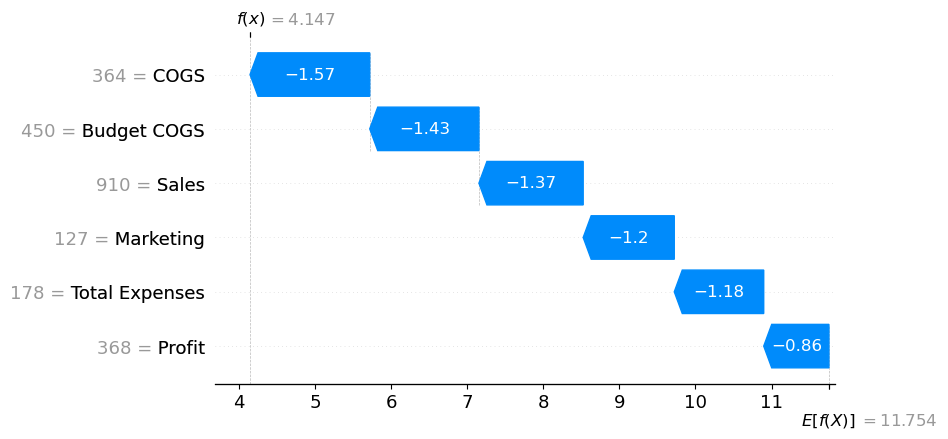

In [193]:
# Pass the anomaly 2 to the SHAP explainer 
shap_value = explainer(anomaly_2)

# SHAP values plot for anomaly 2 

shap.plots.waterfall(shap_value[0], max_display=10)

In [194]:
feature_names = shap_value[0].feature_names
shap_values = shap_value[0].values
df_shap = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Value": shap_values,
}).sort_values(by="SHAP Value", key=abs, ascending=False)

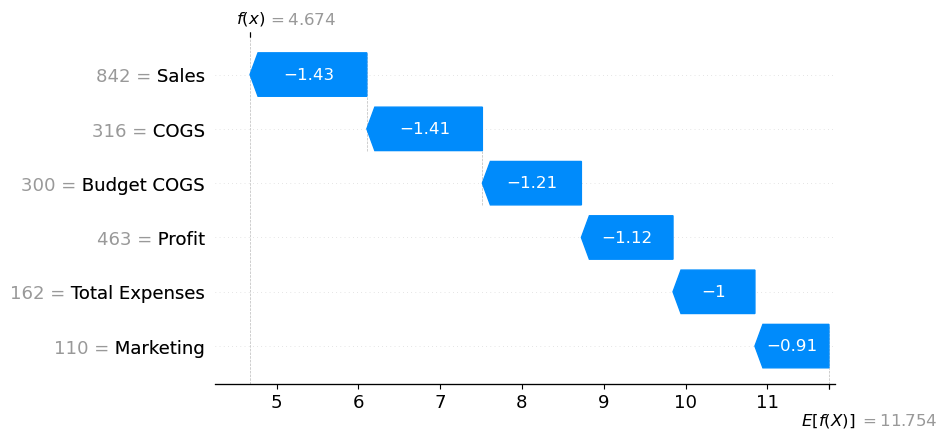

In [202]:
# Pass the anomaly 3 to the SHAP explainer 
shap_value = explainer(anomaly_3)

# SHAP values plot for anomaly 3 

shap.plots.waterfall(shap_value[0], max_display=10)

In [203]:
feature_names = shap_value[0].feature_names
shap_values = shap_value[0].values
df_shap = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Value": shap_values,
}).sort_values(by="SHAP Value", key=abs, ascending=False)

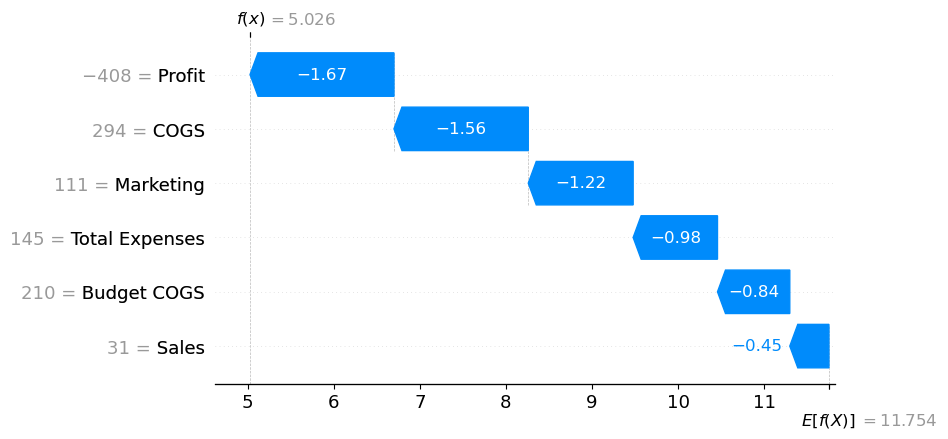

In [209]:
# Pass the anomaly 4 to the SHAP explainer 
shap_value = explainer(anomaly_4)

# SHAP values plot for anomaly 4

shap.plots.waterfall(shap_value[0], max_display=10)

In [1]:
anomaly_5

NameError: name 'anomaly_5' is not defined

In [33]:
feature_names = shap_value[0].feature_names
shap_values = shap_value[0].values
df_shap = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Value": shap_values,
}).sort_values(by="SHAP Value", key=abs, ascending=False)

NameError: name 'shap_value' is not defined

In [32]:
# Pass the anomaly 5 to the SHAP explainer 
shap_value = explainer(anomaly_5)

# SHAP values plot for anomaly 5

shap.plots.waterfall(shap_value[0], max_display=10)

NameError: name 'explainer' is not defined

In [221]:
feature_names = shap_value[0].feature_names
shap_values = shap_value[0].values
df_shap = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Value": shap_values,
}).sort_values(by="SHAP Value", key=abs, ascending=False)

In [76]:
### Do not use. The queality of the output is really bad.  ###

from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

tokenizer = AutoTokenizer.from_pretrained(model_id, token=True)
model = AutoModelForCausalLM.from_pretrained(model_id, token=True)


In [82]:
inputs = tokenizer(input_text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=2000)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Take the role of a financial analyst and provide insights on this anomaly.
Consider the possible impact on the business stores and mitigation plan be concise:
COGS: 364.0, Sales: 904.0, Marketing: 127.0,
Total Expenses: 166.0, Budget COGS: 450.0, Profit: 511.0.
Also, these are the mean for the normal data: 
COGS: 84, Sales: 192, Marketing: 31, Total Expenses: 54, Budget COGS: 74, Profit: 61  

Budget:
COGS: 450.0, Sales: 1200.0, Marketing: 150.0, Total Expenses: 166.0, Budget COGS: 450.0, Profit: 511.0

Profit: 511.0

The anomaly is that the sales are higher than the budgeted amount. The reason for this anomaly is that the marketing expenses are higher than the budgeted amount. The marketing expenses are 150.0, which is higher than the budgeted amount of 150.0. This means that the marketing expenses are not covered by the sales revenue.

To mitigate this anomaly, the company can increase the marketing budget by 10% to cover the higher marketing expenses. This will result in a budgeted 

In [149]:
stats_rounded

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit
mean,84.4,193.0,31.2,54.1,74.8,61.1
std,67.2,151.1,27.0,32.4,66.2,101.7
25%,43.0,100.0,13.0,33.0,30.0,17.0
75%,100.0,230.0,39.0,65.0,90.0,92.0


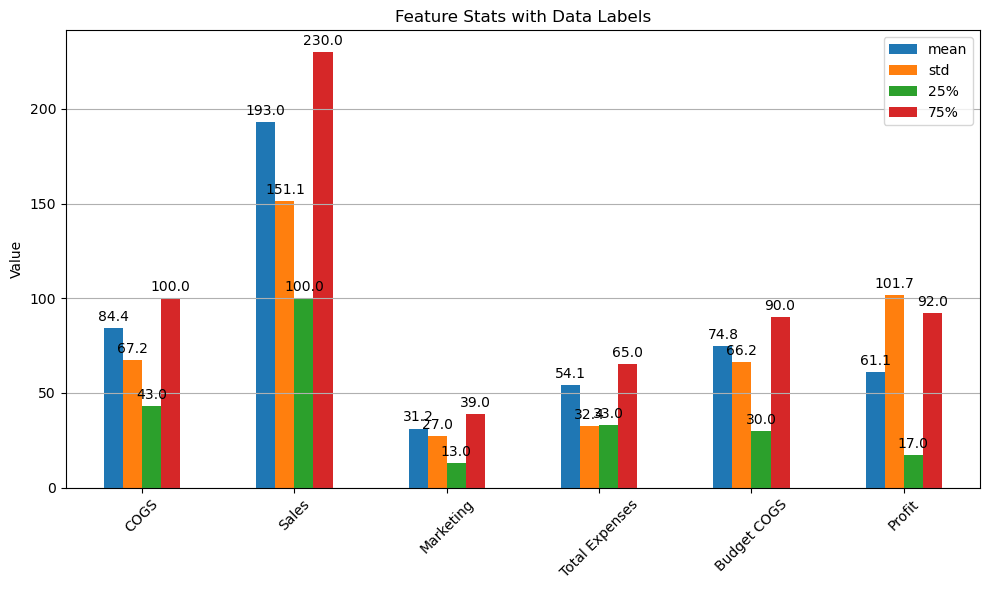

In [143]:
# test - visualization to see descriptive statistics
stats_T = stats.T

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
stats_T.plot(kind='bar', ax=ax)
ax.set_title('Feature Stats with Data Labels')
ax.set_ylabel('Value')
ax.set_xticklabels(stats_T.index, rotation=45)
ax.grid(axis='y')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

In [180]:
prompt

'Take the role of a financial analyst and provide insights on this anomaly using isolation forest.\nConsider the possible impact on the business stores and mitigation plan be concise:\nCOGS: 364.0, Sales: 904.0, Marketing: 127.0,\nTotal Expenses: 166.0, Budget COGS: 450.0, Profit: 511.0.\nAlso, these are the mean for the normal data: \nCOGS: 84, Sales: 192, Marketing: 31, Total Expenses: 54, Budget COGS: 74, Profit: 61 and \nfor this anomaly SHAP values of COGS: -1.54,\nBudget COGS: -1.45, Sales: -1.39, Marketing: -1.16, profit: -1.15, total expenses: -1.01 '

In [59]:
anomaly_1

,COGS,Sales,Marketing,Total Expenses,Budget COGS,Profit
2639,364.0,904.0,127.0,166.0,450.0,511.0


In [34]:
!pip install -q google-generativeai

In [35]:
import google.generativeai as genai

In [ ]:
# List models available

models = genai.list_models()
models_list = list(models)
models_list

In [39]:
prompt = f"""Take the role of a financial analyst and provide insights on this anomaly using isolation forest.
Consider the possible impact on the business stores and mitigation plan be concise:
COGS: {anomaly_5['COGS'].values[0]}, Sales: {anomaly_5['Sales'].values[0]}, Marketing: {anomaly_5['Marketing'].values[0]},
Total Expenses: {anomaly_5['Total Expenses'].values[0]}, Budget COGS: {anomaly_5['Budget COGS'].values[0]}, Profit: {anomaly_5['Profit'].values[0]}.
Also, these are the mean for the normal data: 
COGS: 84, Sales: 192, Marketing: 31, Total Expenses: 54, Budget COGS: 74, Profit: 61 and 
for this anomaly SHAP values of COGS: {round(df_shap[df_shap['Feature'] == 'COGS']['SHAP Value'].values[0], 2)},
Budget COGS: {round(df_shap[df_shap['Feature'] == 'Budget COGS']['SHAP Value'].values[0], 2)}, 
Sales: {round(df_shap[df_shap['Feature'] == 'Sales']['SHAP Value'].values[0], 2)}, 
Marketing: {round(df_shap[df_shap['Feature'] == 'Marketing']['SHAP Value'].values[0], 2)}, 
profit: {round(df_shap[df_shap['Feature'] == 'Profit']['SHAP Value'].values[0], 2)}, 
total expenses: {round(df_shap[df_shap['Feature'] == 'Total Expenses']['SHAP Value'].values[0], 2)} """

In [40]:
prompt

'Take the role of a financial analyst and provide insights on this anomaly using isolation forest.\nConsider the possible impact on the business stores and mitigation plan be concise:\nCOGS: 173.0, Sales: 77.0, Marketing: 156.0,\nTotal Expenses: 176.0, Budget COGS: 160.0, Profit: -392.0.\nAlso, these are the mean for the normal data: \nCOGS: 84, Sales: 192, Marketing: 31, Total Expenses: 54, Budget COGS: 74, Profit: 61 and \nfor this anomaly SHAP values of COGS: -1.54,\nBudget COGS: -1.45, \nSales: -1.39, \nMarketing: -1.16, \nprofit: -1.15, \ntotal expenses: -1.01 '

In [42]:
my_api = "?" ## insert your own API

In [43]:
# Setting up API and importing generativeai

import google.generativeai as genai
genai.configure(api_key= my_api)


In [49]:
# Specifying the model I use 

model = genai.GenerativeModel("gemini-2.0-pro-exp")

In [ ]:
response = model.generate_content(prompt)

In [70]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Okay, acting as a Financial Analyst, here's an analysis of the identified anomaly:\n\n**Subject: Analysis of Financial Performance Anomaly**\n\n**Anomaly Identification:**\nThe Isolation Forest model has flagged a significant anomaly. This data point shows exceptionally high **COGS (173.0)** and **Marketing Spend (156.0)** alongside drastically low **Sales (77.0)**, culminating in a severe **Profit Loss (-392.0)**. These figures deviate starkly from the norm (Avg Profit: 61.0, Avg COGS: 84.0, Avg Sales: 192.0, Avg Marketing: 31.0).\n\n**Key Drivers (Based on SHAP Values):**\nThe anomaly score is primarily driven by:\n1.  **COGS (-1.54):** Actual COGS is over double the average and significantly exceeds its already high budget (160.0).\n2.  **Budget COGS (-1.

In [ ]:
# print just relevant text 
response_content = response.candidates[0].content.parts[0].text
print(response_content)

In [74]:
from IPython.display import display, Markdown

# Display the extracted content as Markdown in Jupyter
display(Markdown(response_content))

Okay, acting as a Financial Analyst, here's an analysis of the identified anomaly:

**Subject: Analysis of Financial Performance Anomaly**

**Anomaly Identification:**
The Isolation Forest model has flagged a significant anomaly. This data point shows exceptionally high **COGS (173.0)** and **Marketing Spend (156.0)** alongside drastically low **Sales (77.0)**, culminating in a severe **Profit Loss (-392.0)**. These figures deviate starkly from the norm (Avg Profit: 61.0, Avg COGS: 84.0, Avg Sales: 192.0, Avg Marketing: 31.0).

**Key Drivers (Based on SHAP Values):**
The anomaly score is primarily driven by:
1.  **COGS (-1.54):** Actual COGS is over double the average and significantly exceeds its already high budget (160.0).
2.  **Budget COGS (-1.45):** The high budgeted figure itself was unusual.
3.  **Sales (-1.39):** Extremely low sales performance is a major contributor.
4.  **Marketing (-1.16):** Very high marketing spend yielded poor results.

**Potential Business Impact:**
*   **Severe Profit Drain:** This specific instance represents a major financial loss, significantly impacting overall profitability if widespread or recurrent.
*   **Operational Inefficiency:** Suggests potential issues in cost control (procurement, production, waste), inventory management, or inaccurate costing.
*   **Poor Marketing ROI:** High marketing expenditure failed to generate expected sales, indicating ineffective campaigns, poor targeting, or external market pressures.
*   **Budgeting Concerns:** Significant variance between budgeted and actual COGS points to flaws in forecasting or execution.

**Mitigation Plan:**
1.  **Urgent Root Cause Analysis:** Investigate *why* COGS were excessive (input costs, spoilage, theft?) and sales plummeted despite high marketing spend (campaign failure, competitor action, product issue?). Is this isolated to a store, product, or time period?
2.  **COGS Control Review:** Implement stricter oversight on procurement, inventory levels, and waste reduction. Re-evaluate costing methodology.
3.  **Sales & Marketing Audit:** Analyze marketing campaign effectiveness and ROI for this period. Review sales strategies, pricing, and product mix relevance.
4.  **Budget Process Refinement:** Improve COGS forecasting accuracy and implement tighter controls to manage spending against budget.

This anomaly requires immediate attention to understand its cause and prevent recurrence, safeguarding the business's financial health.

In [87]:
input_text

'Take the role of a financial analyst and provide insights on this anomaly.\nConsider the possible impact on the business stores and mitigation plan be concise:\nCOGS: 364.0, Sales: 904.0, Marketing: 127.0,\nTotal Expenses: 166.0, Budget COGS: 450.0, Profit: 511.0.\nAlso, these are the mean for the normal data: \nCOGS: 84, Sales: 192, Marketing: 31, Total Expenses: 54, Budget COGS: 74, Profit: 61  '